────────── Shape ──────────
(10, 8)

────────── Head ──────────
   PassengerId  Survived     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0    male  22.0      1      0   7.2500        S
1            2         1  female  38.0      1      0  71.2833        C
2            3         1  female  26.0      0      0   7.9250        S
3            4         1  female  35.0      1      0  53.1000        S
4            5         0    male  35.0      0      0   8.0500        S

────────── Info ──────────
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  10 non-null     int64  
 1   Survived     10 non-null     int64  
 2   Sex          10 non-null     object 
 3   Age          9 non-null      float64
 4   SibSp        10 non-null     int64  
 5   Parch        10 non-null     int64  
 6   Fare         10 non-null     float64
 7 

/tmp/ipython-input-4210763169.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


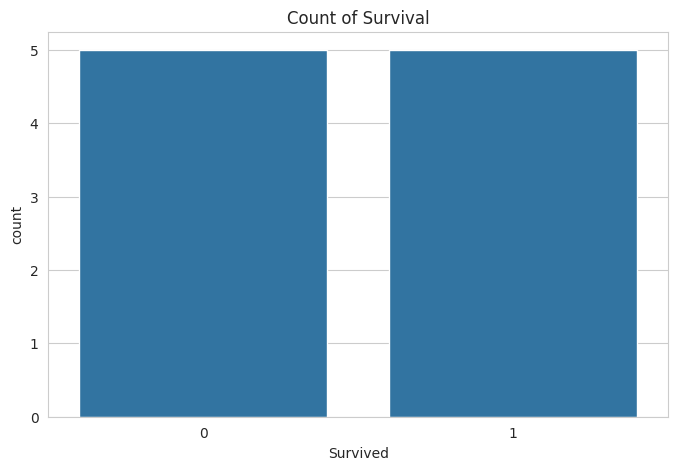

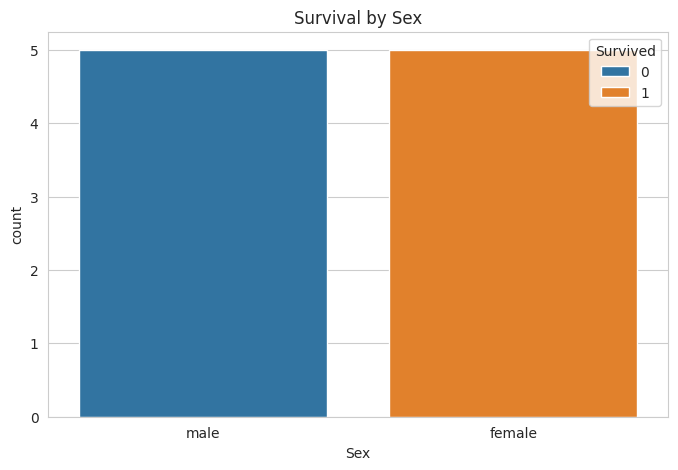

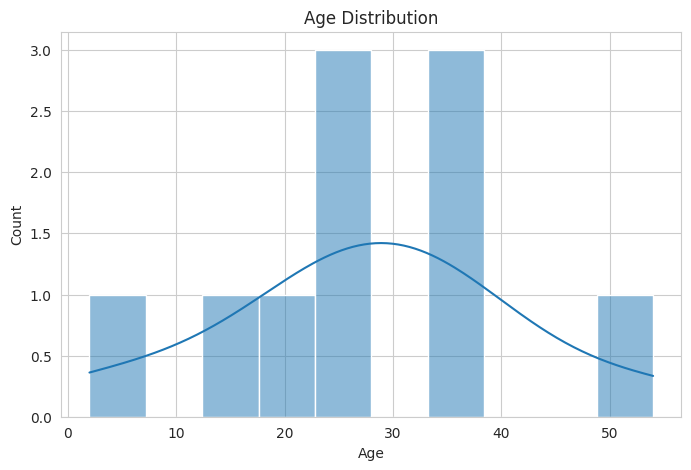

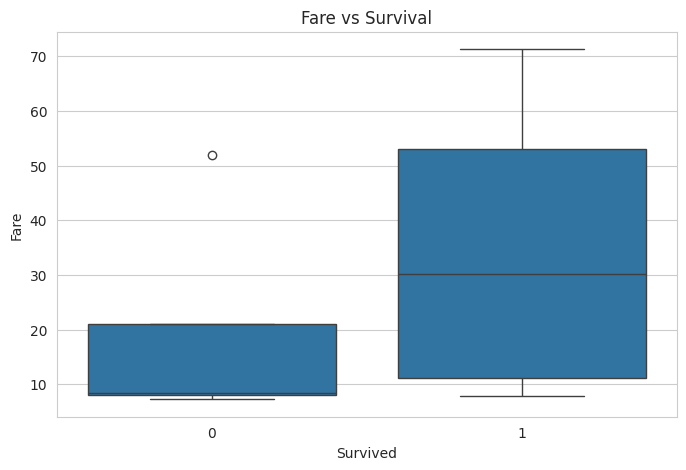


────────── Correlation Matrix ──────────
              Survived           Age     SibSp     Parch      Fare
Survived  1.000000e+00 -2.656908e-17 -0.088045  0.301511  0.343073
Age      -2.656908e-17  1.000000e+00 -0.711124 -0.473521  0.481437
SibSp    -8.804509e-02 -7.111237e-01  1.000000  0.451292  0.054854
Parch     3.015113e-01 -4.735209e-01  0.451292  1.000000 -0.233437
Fare      3.430727e-01  4.814370e-01  0.054854 -0.233437  1.000000


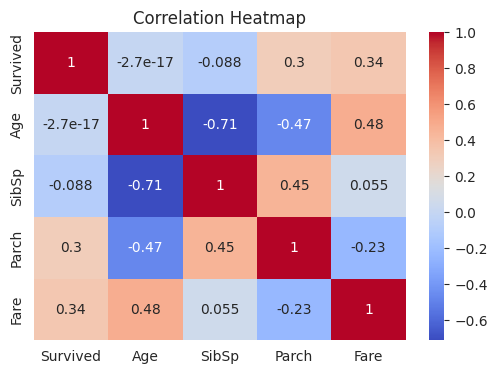


────────── Age Group Distribution ──────────
AgeGroup
Adult     7
Child     1
Teen      1
Middle    1
Senior    0
Name: count, dtype: int64


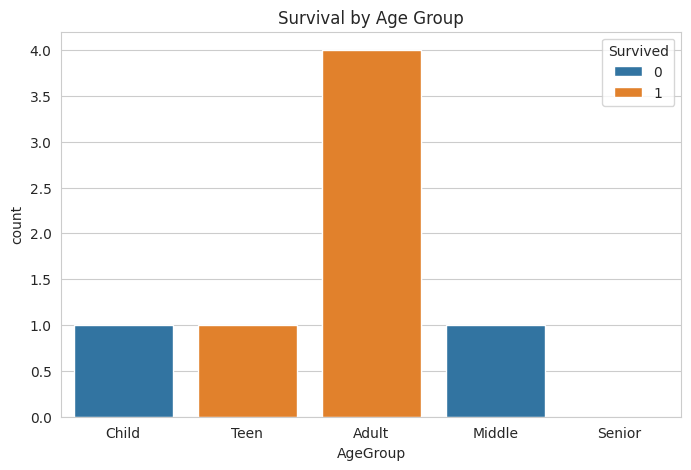


Overall Survival Rate: 50.00%
Male Survival Rate: 0.00%
Female Survival Rate: 100.00%


In [1]:
# ===============================
# TITANIC EDA — FULL WORKFLOW
# ===============================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---- 1) LOAD TITANIC DATA IN-CODE ----
data = [
    [1, 0, "male", 22, 1, 0, 7.25, "S"],
    [2, 1, "female", 38, 1, 0, 71.2833, "C"],
    [3, 1, "female", 26, 0, 0, 7.925, "S"],
    [4, 1, "female", 35, 1, 0, 53.1, "S"],
    [5, 0, "male", 35, 0, 0, 8.05, "S"],
    [6, 0, "male", np.nan, 0, 0, 8.4583, "Q"],
    [7, 0, "male", 54, 0, 0, 51.8625, "S"],
    [8, 0, "male", 2, 4, 1, 21.075, "S"],
    [9, 1, "female", 27, 1, 2, 11.1333, "S"],
    [10, 1, "female", 14, 1, 1, 30.0708, "C"]
]

columns = ["PassengerId","Survived","Sex","Age","SibSp","Parch","Fare","Embarked"]
df = pd.DataFrame(data, columns=columns)

# -----------------------------
# 2) QUICK INSPECTION
# -----------------------------

print("────────── Shape ──────────")
print(df.shape)

print("\n────────── Head ──────────")
print(df.head())

print("\n────────── Info ──────────")
df.info()

print("\n────────── Description ──────────")
print(df.describe(include='all'))

# -----------------------------
# 3) MISSING VALUES CHECK
# -----------------------------

print("\n────────── Missing Values ──────────")
print(df.isnull().sum())

# Impute missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

print("\n→ After imputing Age:")
print(df.isnull().sum())

# -----------------------------
# 4) UNIVARIATE ANALYSIS
# -----------------------------

# Categorical distributions
print("\n────────── Value Counts ──────────")
print("Survived:\n", df["Survived"].value_counts())
print("\nSex:\n", df["Sex"].value_counts())
print("\nEmbarked:\n", df["Embarked"].value_counts())

# -----------------------------
# 5) VISUALIZATIONS
# -----------------------------

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x="Survived", data=df)
plt.title("Count of Survival")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.show()

# -----------------------------
# 6) CORRELATION
# -----------------------------

numeric_cols = ["Survived","Age","SibSp","Parch","Fare"]
corr = df[numeric_cols].corr()

print("\n────────── Correlation Matrix ──────────")
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# 7) FEATURE ENGINEERING
# -----------------------------

# Example: Create Age Group
bins = [0, 12, 18, 40, 60, 100]
labels = ["Child","Teen","Adult","Middle","Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

print("\n────────── Age Group Distribution ──────────")
print(df["AgeGroup"].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(x="AgeGroup", hue="Survived", data=df)
plt.title("Survival by Age Group")
plt.show()

# -----------------------------
# 8) SUMMARY INSIGHTS
# -----------------------------

survival_rate = df["Survived"].mean() * 100
print(f"\nOverall Survival Rate: {survival_rate:.2f}%")

male_survival = df[df["Sex"]=="male"]["Survived"].mean()*100
female_survival = df[df["Sex"]=="female"]["Survived"].mean()*100

print(f"Male Survival Rate: {male_survival:.2f}%")
print(f"Female Survival Rate: {female_survival:.2f}%")
